## Imports

In [128]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire data

In [129]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combine = [train_df, test_df]

In [130]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [132]:
train_df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gilnagh, Miss. Katherine ""Katie""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## Feature Engineering

### Pclass

In [134]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Decision: Include Pclass in model

### Name, Title

In [135]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [136]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [137]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


Decision: Bundle Titles into 4 classes, include in model

1 - Privileged: Sir, Lady, Countess

2 - Standard: Ms, Mme, Mlle, Mrs, Miss, Master, Mr, Dona

3 - Military: Col, Major, Capt

4 - Rare: Dr, Jonkheer, Don, Rev

In [138]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Sir', 'Lady','Countess'], 'Privileged')
    dataset['Title'] = dataset['Title'].replace(['Ms', 'Mme', 'Mlle', 'Mrs', 'Miss', 'Master', 'Mr'], 'Standard')
    dataset['Title'] = dataset['Title'].replace(['Col', 'Major','Capt'], 'Military')
    dataset['Title'] = dataset['Title'].replace(['Dr','Jonkheer','Don','Rev','Dona'], 'Rare')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Military,0.400000
1,Privileged,1.000000
2,Rare,0.200000
3,Standard,0.384793


In [139]:
title_mapping = {"Privileged": 1, "Standard": 2, "Military": 3, "Mare": 4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

### Sex

In [140]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Decision: Include Sex in model

In [141]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Embarked
Complete by filling up with most frequent

In [142]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


Decision: Include Embarked in model

### Age
Complete by analyzing correlation of Pclass, Sex, Embarked, with Age

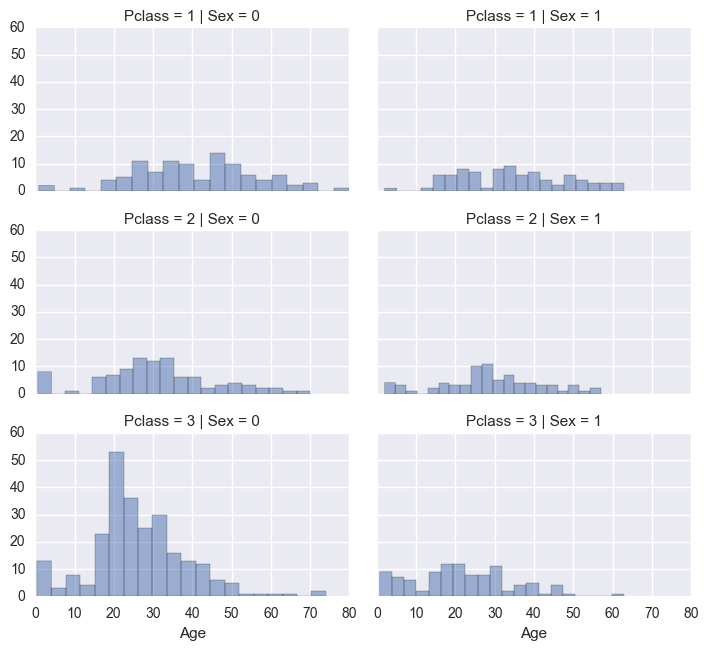

In [143]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

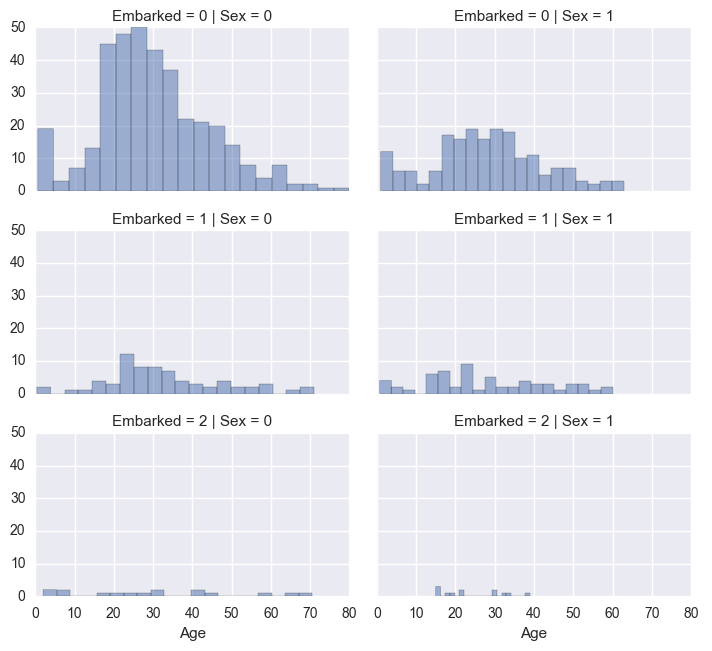

In [144]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Decision: Complete Ages by taking medians over classes Pclass, Sex, and Embarked 

In [145]:
guess_ages = np.zeros((2,3,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            for k in range(0,3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1) & \
                                  (dataset['Embarked'] == k)]['Age'].dropna()
                guess_ages[i,j,k] = guess_df.median()
            
    for i in range(0, 2):
        for j in range(0, 3):
            for k in range(0,3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1) &\
                            (dataset.Embarked == k), 'Age'] = guess_ages[i,j,k]

    dataset['Age'] = dataset['Age'].astype(int)

Decision: Include Agebands in model

In [146]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 5, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 15), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 65), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 65, 'Age'] = 6

### SibSp and Parch

In [147]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [148]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Decision: Categorize SibSp into

0 - SibSp = 0

1 - SibSp = 1 or 2

2 - SibSp >= 3

Categorize Parch into

0 - alone or Parch >= 4

1 - Parch = 1, 2 or 3

In [149]:
for dataset in combine:
    dataset['SibSp'] = dataset['SibSp'].replace(2, 1)
    dataset['SibSp'] = dataset['SibSp'].replace([3,4,5,6,8,9,10], 2)
    dataset['Parch'] = dataset['Parch'].replace([4,5,6,7,8,9,10], 0)
    dataset['Parch'] = dataset['Parch'].replace([2,3], 1)

### Ticket
Decision: Do not include Ticket in model

In [150]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

### Fare
Complete Test set by analyzing correlation of Fare with Embarked, Pclass and Sex

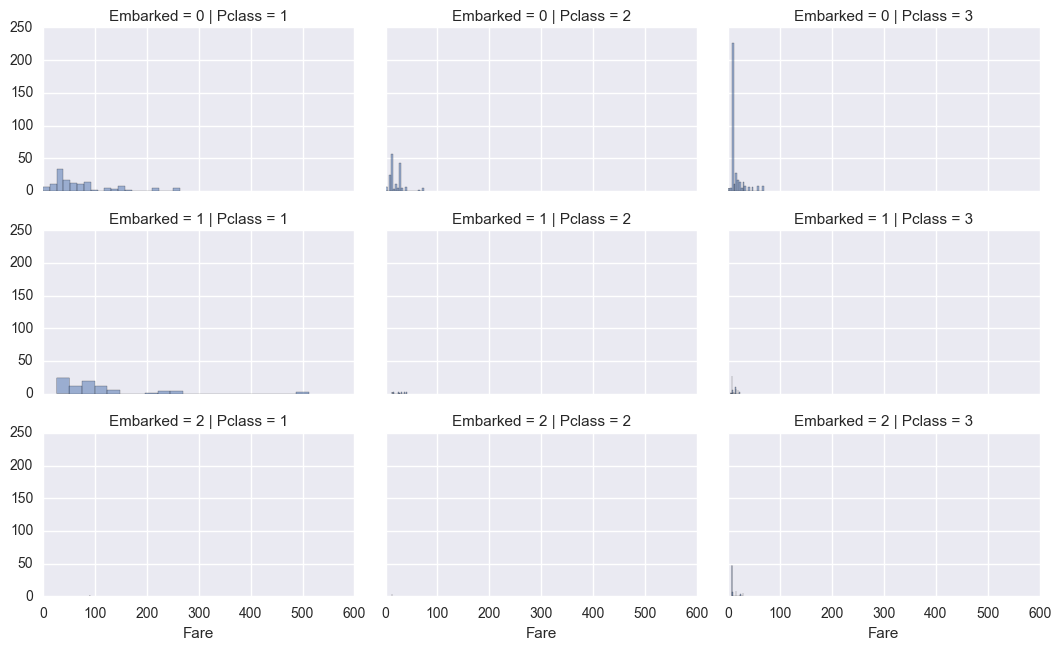

In [151]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend()

In [152]:
guess_fares = np.zeros((2,3,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            for k in range(0,3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1) & \
                                  (dataset['Embarked'] == k)]['Age'].dropna()
                guess_fares[i,j,k] = guess_df.median()
            
    for i in range(0, 2):
        for j in range(0, 3):
            for k in range(0,3):
                dataset.loc[ (dataset.Fare.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1) &\
                            (dataset.Embarked == k), 'Fare'] = guess_fares[i,j,k]

    dataset['Fare'] = dataset['Fare'].astype(int)

Decision: Include Fare bands in model

In [153]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 50), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 50, 'Fare'] = 4

### Cabin
Analyze effect of Cabin field empty or not

In [154]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna(0)
    dataset.loc[dataset['Cabin'] != 0, 'Cabin'] = 1
train_df[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
1,1,0.666667
0,0,0.299854


Decision: Include Cabin emtpy or not in model

In [155]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,2,1,0,0,0,0,2
1,2,1,1,1,4,1,0,4,1,1,2
2,3,1,3,1,3,0,0,0,0,0,2
3,4,1,1,1,3,1,0,4,1,0,2
4,5,0,3,0,3,0,0,0,0,0,2


## Prediction

In [260]:
X_train = train_df.query('PassengerId%2 == 0').drop("Survived", axis=1)
Y_train = train_df.query('PassengerId%2 == 0')["Survived"]

X_train = X_train.drop(['PassengerId'], axis=1)

X_test0  = test_df.drop("PassengerId", axis=1).copy()
X_test = train_df.query('PassengerId%2 == 1').drop("Survived", axis=1)
Y_reslt = train_df.query('PassengerId%2 == 1')["Survived"]
X_test = X_test.drop(['PassengerId'], axis=1)
X_train.shape, Y_train.shape, X_test.shape, X_test0.shape

((445, 9), (445,), (446, 9), (418, 9))

In [261]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test0)
Y_test = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_log = compare.sum()/len(compare)
acc_log

0.80044843049327352

In [262]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.296398
6,Fare,0.720292
8,Embarked,0.641089
7,Cabin,0.245578
4,SibSp,0.154297
5,Parch,0.120647
2,Sex,-0.453249
3,Age,-0.546378
0,Survived,-0.752525
9,Title,NaN


In [263]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test0)
Y_test = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_svc = compare.sum()/len(compare)
acc_svc

0.82511210762331844

In [264]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test0)
Y_test = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_knn = compare.sum()/len(compare)
acc_knn

0.81838565022421528

In [265]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test0)
Y_test = gaussian.predict(X_test)
#acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_gaussian = compare.sum()/len(compare)
acc_gaussian

0.76681614349775784

In [266]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test0)
Y_test = perceptron.predict(X_test)
#acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_perceptron = compare.sum()/len(compare)
acc_perceptron

0.75560538116591924

In [267]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test0)
Y_test = linear_svc.predict(X_test)
#acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_linear_svc = compare.sum()/len(compare)
acc_linear_svc

0.8094170403587444

In [268]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test0)
Y_test = sgd.predict(X_test)
#acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_sgd = compare.sum()/len(compare)
acc_sgd

0.76457399103139012

In [269]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test0)
Y_test = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_decision_tree = compare.sum()/len(compare)
acc_decision_tree

0.79596412556053808

In [270]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test0)
Y_test = random_forest.predict(X_test)
#acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
compare = Y_test == Y_reslt
acc_random_forest = compare.sum()/len(compare)
acc_random_forest

0.7982062780269058

In [271]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.825112
1,KNN,0.818386
7,Linear SVC,0.809417
2,Logistic Regression,0.800448
3,Random Forest,0.798206
8,Decision Tree,0.795964
4,Naive Bayes,0.766816
6,Stochastic Gradient Decent,0.764574
5,Perceptron,0.755605


Decision: Use Support Vector Machines

In [273]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_train = X_train.drop(['PassengerId'], axis=1)
X_test0  = test_df.drop("PassengerId", axis=1).copy()
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test0)


submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)